

<img src="./template/assets/img/dss_dia03.jpg">

# <a>Do Zero ao Projeto</a>

Esse é o Jupyter Notebook, para quem não conhecia, prazer!! Aqui conseguimos incluir textos como esse, ou código Python (e R também, eca, como na célula abaixo!

Fomos contratados como cientistas de dados pela Let's Ride! Mas o chefe não quer saber de brincadeira, quer um aplicativo pra auxiliar os vendedores e vendedoras a precificar os carros corretamente!!

Nesse notebook vamos criar o modelo preditivo para prever preços de carros com base em suas características!! Uma vez com o modelo campeão, vamos criar uma aplicação para que possamos prever os preços de carros da concessionária.

Passos:
- 01 - Análise Exploratória de Dados! (limpeza de dados, visualização)
- 02 - Criar o modelo que vai prever os preços dos carros (machine learning!)
- 03 - Mostrar como seria o site da Let's Ride com o modelo de preços integrado


Os templates utilizados são do [Multi Boostrap Template](https://bootstrapmade.com/multi-responsive-bootstrap-template/)

O notebook teve como base [esse notebook](https://www.kaggle.com/code/moe5998/car-price-prediction-eda-ml-regression-models) e [esse aqui](https://www.kaggle.com/code/ahmetcalis/car-price-prediction), os dois disponíveis no Kaggle (site de competições de ciência de dados, além de ter muito conteúdo pra aprendizado!).

## <a>Importando todas as bibliotecas necessárias!</a>

- `import numpy as np`: Importa a biblioteca NumPy para operações numéricas eficientes.
- `import pandas as pd`: Importa a biblioteca Pandas para manipulação e análise de dados.
- `import matplotlib.pyplot as plt`: Importa a biblioteca Matplotlib para visualização de gráficos.
- `import seaborn as sns`: Importa a biblioteca Seaborn para visualização estatística de dados.
- `from sklearn.preprocessing import OneHotEncoder`: Importa classes específicas de pré-processamento de dados do scikit-learn.
- `from sklearn.model_selection import train_test_split, cross_val_score`: Importa classes específicas para divisão de dados, e validação cruzada.
- `from sklearn.linear_model import LinearRegression`: Importa classes específicas para modelos de regressão linear.
- `from sklearn.metrics import r2_score`: Importa a função r2_score do scikit-learn para avaliar o desempenho de modelos de regressão.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## <a>Pandas é uma das ferramentas mais importantes para qualquer Cientista de Dados!</a>

Vamos ler a base de dados de carros

In [2]:
df = pd.read_csv("./data/raw/car_price_prediction.csv")

In [3]:
# Buscando as 5 primeiras linhas pra dar uma cheirada nos dados
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [4]:
# Quantas linhas e colunas
df.shape

(19237, 18)

In [5]:
# Vamos trauzir as colunas? Não custa nada
df.columns = ['ID', 'Preco', 'Taxa', 'Marca', 'Modelo', 'Ano Fabricacao', 'Categoria', 
             'Bancos de Couro', 'Combustivel', 'Volume Motor', 'Quilometragem', 'Cilindradas', 
             'Cambio', 'Tracao', 'Portas', 'Direcao', 'Cor', 'Airbags']

df.head()

ID  Preco  Taxa      Marca   Modelo  Ano Fabricacao  Categoria  \
0  45654403  13328  1399      LEXUS   RX 450            2010       Jeep   
1  44731507  16621  1018  CHEVROLET  Equinox            2011       Jeep   
2  45774419   8467     -      HONDA      FIT            2006  Hatchback   
3  45769185   3607   862       FORD   Escape            2011       Jeep   
4  45809263  11726   446      HONDA      FIT            2014  Hatchback   

  Bancos de Couro Combustivel Volume Motor Quilometragem  Cilindradas  \
0             Yes      Hybrid          3.5     186005 km          6.0   
1              No      Petrol            3     192000 km          6.0   
2              No      Petrol          1.3     200000 km          4.0   
3             Yes      Hybrid          2.5     168966 km          4.0   
4             Yes      Petrol          1.3      91901 km          4.0   

      Cambio Tracao  Portas           Direcao     Cor  Airbags  
0  Automatic    4x4  04-May        Left wheel  Silver       12  
1  Tiptronic    4x4  04-May        Left wheel   Black        8  
2   Variator  Front  04-May  Right-hand drive   Black        2  
3  Automatic    4x4  04-May        Left wheel   White        0  
4  Automatic  Front  04-May        Left wheel  Silver        4

In [6]:
# Vamos dar uma olhada nos tipos e ver se tem alguns dados faltantes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               19237 non-null  int64  
 1   Preco            19237 non-null  int64  
 2   Taxa             19237 non-null  object 
 3   Marca            19237 non-null  object 
 4   Modelo           19237 non-null  object 
 5   Ano Fabricacao   19237 non-null  int64  
 6   Categoria        19237 non-null  object 
 7   Bancos de Couro  19237 non-null  object 
 8   Combustivel      19237 non-null  object 
 9   Volume Motor     19237 non-null  object 
 10  Quilometragem    19237 non-null  object 
 11  Cilindradas      19237 non-null  float64
 12  Cambio           19237 non-null  object 
 13  Tracao           19237 non-null  object 
 14  Portas           19237 non-null  object 
 15  Direcao          19237 non-null  object 
 16  Cor              19237 non-null  object 
 17  Airbags     

In [7]:
# Uma estatística descritiva básica, pra ver a distribuição dos dados
df.describe()

ID         Preco  Ano Fabricacao   Cilindradas       Airbags
count  1.923700e+04  1.923700e+04    19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04     2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05        5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00     1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03     2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04     2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04     2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07     2020.000000     16.000000     16.000000

In [8]:
# Esse formato científico pra números é meio chatinho! vamos deixar com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

ID       Preco  Ano Fabricacao  Cilindradas  Airbags
count    19237.00    19237.00        19237.00     19237.00 19237.00
mean  45576535.89    18555.93         2010.91         4.58     6.58
std     936591.42   190581.27            5.67         1.20     4.32
min   20746880.00        1.00         1939.00         1.00     0.00
25%   45698374.00     5331.00         2009.00         4.00     4.00
50%   45772308.00    13172.00         2012.00         4.00     6.00
75%   45802036.00    22075.00         2015.00         4.00    12.00
max   45816654.00 26307500.00         2020.00        16.00    16.00

In [9]:
# Será que tem valores faltantes?
df.isna().sum()

ID                 0
Preco              0
Taxa               0
Marca              0
Modelo             0
Ano Fabricacao     0
Categoria          0
Bancos de Couro    0
Combustivel        0
Volume Motor       0
Quilometragem      0
Cilindradas        0
Cambio             0
Tracao             0
Portas             0
Direcao            0
Cor                0
Airbags            0
dtype: int64

In [10]:
# Será que tem carro duplicado??
df['ID'].duplicated().sum()

313

***Temos 313 carros duplicados***

In [11]:
df['Taxa'].value_counts()

Taxa
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

***Tem um valor esquisito aí (parece a vida real): '-'***

In [12]:
df['Quilometragem'].value_counts()

Quilometragem
0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: count, Length: 7687, dtype: int64

***Quilometragem está com valores misturados de númerico e objeto (pode ser texto ou data, por exemplo)***

In [13]:
df['Volume Motor'].value_counts()

Volume Motor
2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

***Volume do motor com valores objeto e numérico***


In [14]:
df['Portas'].value_counts()

Portas
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

***Maio?? Tá doidão??? Bem-vindo ao mundo real, padawan!!! Os valores corretos são: 2-3, 4-5, >5.***

## <a>Tratamento de Dados</a>

Já achamos vários errinhos! Isso é importante nesse exerício porque na vida real é onde passamos MAIS TEMPO! Aprender a deixar os dados tratadinhos é uma destreza importante para se tornar profissional de sucesso.

In [15]:
# Primeiro, vamos remover a coluna de identificação única do carro
# Normalmente essas identificações não trazem informações relevantes para previsão
df = df.drop('ID', axis=1)

In [16]:
df.head()

Preco  Taxa      Marca   Modelo  Ano Fabricacao  Categoria Bancos de Couro  \
0  13328  1399      LEXUS   RX 450            2010       Jeep             Yes   
1  16621  1018  CHEVROLET  Equinox            2011       Jeep              No   
2   8467     -      HONDA      FIT            2006  Hatchback              No   
3   3607   862       FORD   Escape            2011       Jeep             Yes   
4  11726   446      HONDA      FIT            2014  Hatchback             Yes   

  Combustivel Volume Motor Quilometragem  Cilindradas     Cambio Tracao  \
0      Hybrid          3.5     186005 km         6.00  Automatic    4x4   
1      Petrol            3     192000 km         6.00  Tiptronic    4x4   
2      Petrol          1.3     200000 km         4.00   Variator  Front   
3      Hybrid          2.5     168966 km         4.00  Automatic    4x4   
4      Petrol          1.3      91901 km         4.00  Automatic  Front   

   Portas           Direcao     Cor  Airbags  
0  04-May        Left wheel  Silver       12  
1  04-May        Left wheel   Black        8  
2  04-May  Right-hand drive   Black        2  
3  04-May        Left wheel   White        0  
4  04-May        Left wheel  Silver        4

In [17]:
# Vamos transformar as taxas todas em numéricas
df['Taxa']= pd.to_numeric(df['Taxa'], errors='coerce')

***Corrigimos a coluna de taxas para converter valores não numéricos***

In [18]:
# Vamos extrair somente a parte numérica da Quilometragem!
df['Quilometragem'] = df['Quilometragem'].str.extract('(\d+)')
df['Quilometragem'] = pd.to_numeric(df['Quilometragem'], errors='coerce')

df.head()

Preco    Taxa      Marca   Modelo  Ano Fabricacao  Categoria  \
0  13328 1399.00      LEXUS   RX 450            2010       Jeep   
1  16621 1018.00  CHEVROLET  Equinox            2011       Jeep   
2   8467     NaN      HONDA      FIT            2006  Hatchback   
3   3607  862.00       FORD   Escape            2011       Jeep   
4  11726  446.00      HONDA      FIT            2014  Hatchback   

  Bancos de Couro Combustivel Volume Motor  Quilometragem  Cilindradas  \
0             Yes      Hybrid          3.5         186005         6.00   
1              No      Petrol            3         192000         6.00   
2              No      Petrol          1.3         200000         4.00   
3             Yes      Hybrid          2.5         168966         4.00   
4             Yes      Petrol          1.3          91901         4.00   

      Cambio Tracao  Portas           Direcao     Cor  Airbags  
0  Automatic    4x4  04-May        Left wheel  Silver       12  
1  Tiptronic    4x4  04-May        Left wheel   Black        8  
2   Variator  Front  04-May  Right-hand drive   Black        2  
3  Automatic    4x4  04-May        Left wheel   White        0  
4  Automatic  Front  04-May        Left wheel  Silver        4

In [19]:
df['Quilometragem'].describe()

count        19237.00
mean       1532235.69
std       48403869.38
min              0.00
25%          70139.00
50%         126000.00
75%         188888.00
max     2147483647.00
Name: Quilometragem, dtype: float64

In [20]:
# Limpeza de outliers
df.loc[df['Quilometragem'] > 1e7].head()

Preco  Taxa          Marca  Modelo  Ano Fabricacao Categoria  \
985    2700   NaN           OPEL  Vectra            1997     Sedan   
1404   9095   NaN            BMW     328            2002     Sedan   
1892   7213   NaN  MERCEDES-BENZ   C 180            1997     Sedan   
2278   6899   NaN     VOLKSWAGEN    Golf            1999     Sedan   
4823   3000   NaN            UAZ   31514            1991     Coupe   

     Bancos de Couro Combustivel Volume Motor  Quilometragem  Cilindradas  \
985               No         CNG          1.6      777777777         4.00   
1404              No      Petrol          2.8       55556665         6.00   
1892              No      Petrol          1.8       11111111         4.00   
2278              No      Petrol          1.6     2147483647         4.00   
4823              No      Petrol          1.8       12648846         4.00   

         Cambio Tracao  Portas     Direcao     Cor  Airbags  
985   Automatic  Front  04-May  Left wheel   Beige        2  
1404     Manual   Rear  04-May  Left wheel  Silver        6  
1892     Manual   Rear  04-May  Left wheel  Silver        2  
2278     Manual  Front  04-May  Left wheel   Black        4  
4823     Manual    4x4  02-Mar  Left wheel   Green        0

In [21]:
# Filtrando outliers
df = df.loc[df['Quilometragem'] < 1e7]

df.shape

(19205, 17)

***Corrijindo quilometragem, apenas valores numéricos***

In [22]:
#df['Volume Motor'] = [float(value.split(' ')[0]) for value in df['Engine volume']]
df['Volume Motor'] = df['Volume Motor'].str.extract('(\d+)')
df['Volume Motor'] = pd.to_numeric(df['Volume Motor'], errors='coerce')

df.head()

Preco    Taxa      Marca   Modelo  Ano Fabricacao  Categoria  \
0  13328 1399.00      LEXUS   RX 450            2010       Jeep   
1  16621 1018.00  CHEVROLET  Equinox            2011       Jeep   
2   8467     NaN      HONDA      FIT            2006  Hatchback   
3   3607  862.00       FORD   Escape            2011       Jeep   
4  11726  446.00      HONDA      FIT            2014  Hatchback   

  Bancos de Couro Combustivel  Volume Motor  Quilometragem  Cilindradas  \
0             Yes      Hybrid             3         186005         6.00   
1              No      Petrol             3         192000         6.00   
2              No      Petrol             1         200000         4.00   
3             Yes      Hybrid             2         168966         4.00   
4             Yes      Petrol             1          91901         4.00   

      Cambio Tracao  Portas           Direcao     Cor  Airbags  
0  Automatic    4x4  04-May        Left wheel  Silver       12  
1  Tiptronic    4x4  04-May        Left wheel   Black        8  
2   Variator  Front  04-May  Right-hand drive   Black        2  
3  Automatic    4x4  04-May        Left wheel   White        0  
4  Automatic  Front  04-May        Left wheel  Silver        4

***volume do motor, apenas valores numéricos***

In [23]:
df['Portas'] = df['Portas'].replace({'02-Mar': '2-3', '04-May': '4-5'})

df.head()

Preco    Taxa      Marca   Modelo  Ano Fabricacao  Categoria  \
0  13328 1399.00      LEXUS   RX 450            2010       Jeep   
1  16621 1018.00  CHEVROLET  Equinox            2011       Jeep   
2   8467     NaN      HONDA      FIT            2006  Hatchback   
3   3607  862.00       FORD   Escape            2011       Jeep   
4  11726  446.00      HONDA      FIT            2014  Hatchback   

  Bancos de Couro Combustivel  Volume Motor  Quilometragem  Cilindradas  \
0             Yes      Hybrid             3         186005         6.00   
1              No      Petrol             3         192000         6.00   
2              No      Petrol             1         200000         4.00   
3             Yes      Hybrid             2         168966         4.00   
4             Yes      Petrol             1          91901         4.00   

      Cambio Tracao Portas           Direcao     Cor  Airbags  
0  Automatic    4x4    4-5        Left wheel  Silver       12  
1  Tiptronic    4x4    4-5        Left wheel   Black        8  
2   Variator  Front    4-5  Right-hand drive   Black        2  
3  Automatic    4x4    4-5        Left wheel   White        0  
4  Automatic  Front    4-5        Left wheel  Silver        4

***02-Mar para 2-3 e 04-May para 4-5***

## <a>Visualização de Dados!</a>

In [24]:
import plotly.express as px

# Contagem de carros por fabricante
car_counts = df['Marca'].value_counts().reset_index()
car_counts.columns = ['Marca', 'Count']

# Criação do treemap
fig = px.treemap(car_counts, path=['Marca'], values='Count', labels={'Marca'})

# Exibição do treemap
fig.show()

In [25]:
import plotly.express as px

# Criação do gráfico KDE com Plotly
fig = px.histogram(df, x='Taxa', nbins=50, marginal='rug', color_discrete_sequence=['red'])

# Definição dos limites do eixo x
fig.update_xaxes(range=[-10, 4000])

# Exibição do gráfico
fig.show()

***A maioria dos valores está entre mais de 0 e menos de 2000***

In [26]:
# Criação do gráfico countplot com Plotly
fig = px.histogram(df, x='Categoria', color='Categoria', title="Qtdade em cada Categoria")

# Personalização do layout
fig.update_layout(
    xaxis=dict(title='Categoria'),
    yaxis=dict(title='Quantidade'),
    showlegend=False
)

# Exibição do gráfico
fig.show()

***A maioria dos tipos de categorias são Sedan, Hatchback e Jeep.***


In [27]:
# Criação do gráfico KDE com Plotly
fig = px.histogram(df, x='Airbags', nbins=30, marginal='rug', color_discrete_sequence=['blue'], opacity=0.5)

# Exibição do gráfico
fig.show()

***A maioria dos carros tem de 3 a 5 airbags ou 13 airbags***


In [28]:
# Criação do gráfico de densidade com Plotly
fig = px.histogram(df, x='Quilometragem', nbins=30, histnorm='density', marginal='rug', color_discrete_sequence=['blue'], opacity=0.5)

# Personalização do layout
fig.update_layout(
    title='Density Plot',
    xaxis=dict(title='Quilometragem'),
    yaxis=dict(title='Density'),
)

# Exibição do gráfico
fig.show()

C:\Users\leons\AppData\Local\Temp\ipykernel_20216\3138560003.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Quilometragem', ylabel='Density'>

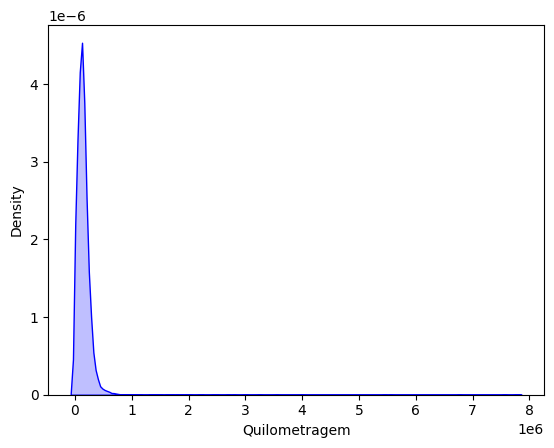

In [29]:
sns.kdeplot(df['Quilometragem'], color='b', shade=True)

***A quilometragem da maioria dos carros é 0,0 (a maioria dos carros é nova)***

In [30]:
df.head(10)

Preco    Taxa      Marca    Modelo  Ano Fabricacao  Categoria  \
0  13328 1399.00      LEXUS    RX 450            2010       Jeep   
1  16621 1018.00  CHEVROLET   Equinox            2011       Jeep   
2   8467     NaN      HONDA       FIT            2006  Hatchback   
3   3607  862.00       FORD    Escape            2011       Jeep   
4  11726  446.00      HONDA       FIT            2014  Hatchback   
5  39493  891.00    HYUNDAI  Santa FE            2016       Jeep   
6   1803  761.00     TOYOTA     Prius            2010  Hatchback   
7    549  751.00    HYUNDAI    Sonata            2013      Sedan   
8   1098  394.00     TOYOTA     Camry            2014      Sedan   
9  26657     NaN      LEXUS    RX 350            2007       Jeep   

  Bancos de Couro Combustivel  Volume Motor  Quilometragem  Cilindradas  \
0             Yes      Hybrid             3         186005         6.00   
1              No      Petrol             3         192000         6.00   
2              No      Petrol             1         200000         4.00   
3             Yes      Hybrid             2         168966         4.00   
4             Yes      Petrol             1          91901         4.00   
5             Yes      Diesel             2         160931         4.00   
6             Yes      Hybrid             1         258909         4.00   
7             Yes      Petrol             2         216118         4.00   
8             Yes      Hybrid             2         398069         4.00   
9             Yes      Petrol             3         128500         6.00   

      Cambio Tracao Portas           Direcao     Cor  Airbags  
0  Automatic    4x4    4-5        Left wheel  Silver       12  
1  Tiptronic    4x4    4-5        Left wheel   Black        8  
2   Variator  Front    4-5  Right-hand drive   Black        2  
3  Automatic    4x4    4-5        Left wheel   White        0  
4  Automatic  Front    4-5        Left wheel  Silver        4  
5  Automatic  Front    4-5        Left wheel   White        4  
6  Automatic  Front    4-5        Left wheel   White       12  
7  Automatic  Front    4-5        Left wheel    Grey       12  
8  Automatic  Front    4-5        Left wheel   Black       12  
9  Automatic    4x4    4-5        Left wheel  Silver       12

In [31]:
# Criação do gráfico de histograma com Plotly
# df de dataframe, que nada mais é que um tabelão, estilo excel
fig = px.histogram(df, x='Ano Fabricacao', nbins=20, title='Histograma')

# Personalização do layout
'''
fig.update_layout(
    xaxis=dict(title='Ano Fabricacao'),
    yaxis=dict(title='Quantidade'),
)
'''

# Exibição do gráfico
fig.show()

***A maioria dos carros está entre (2010 - 2020), mas temos alguns carros muito antigos***

In [32]:
# Criação do gráfico de histograma com Plotly
fig = px.histogram(df, x='Volume Motor', nbins=20, title='Histograma')

# Personalização do layout
fig.update_layout(
    xaxis=dict(title='Volume Motor'),
    yaxis=dict(title='Quantidade'),
)

# Exibição do gráfico
fig.show()

C:\Users\leons\AppData\Local\Temp\ipykernel_20216\146740702.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Volume Motor', ylabel='Density'>

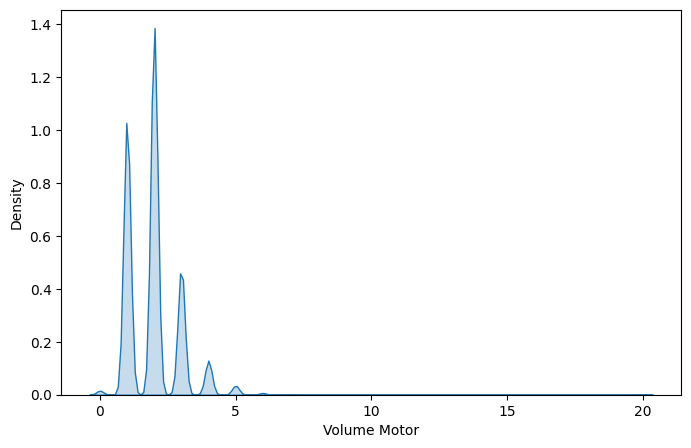

In [33]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Volume Motor'], shade = True)

***A maior parte do volume do motor está na faixa de (1 a 5)***

Text(0.5, 1.0, 'Qtde de cores')

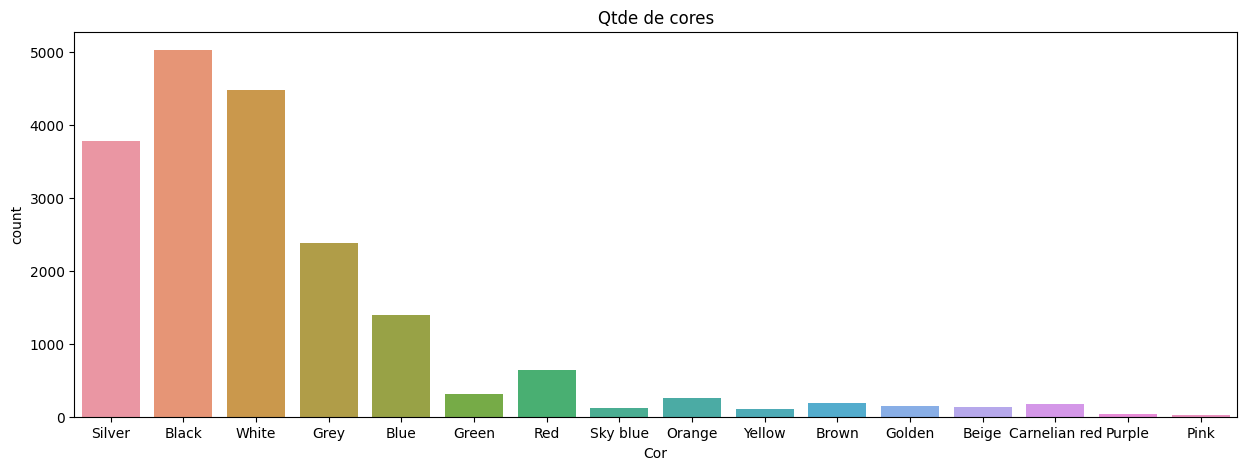

In [34]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(data=df, x='Cor')
plt.title("Qtde de cores")

<Axes: xlabel='Portas', ylabel='count'>

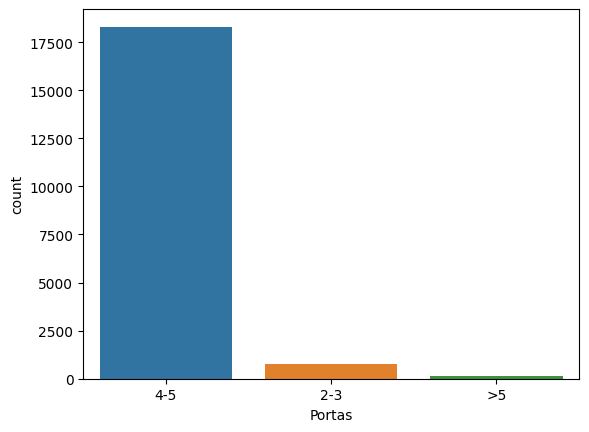

In [35]:
sns.countplot(data=df, x='Portas')

***Maioria tem de 4 a 5 portas***

<Axes: xlabel='Preco', ylabel='Taxa'>

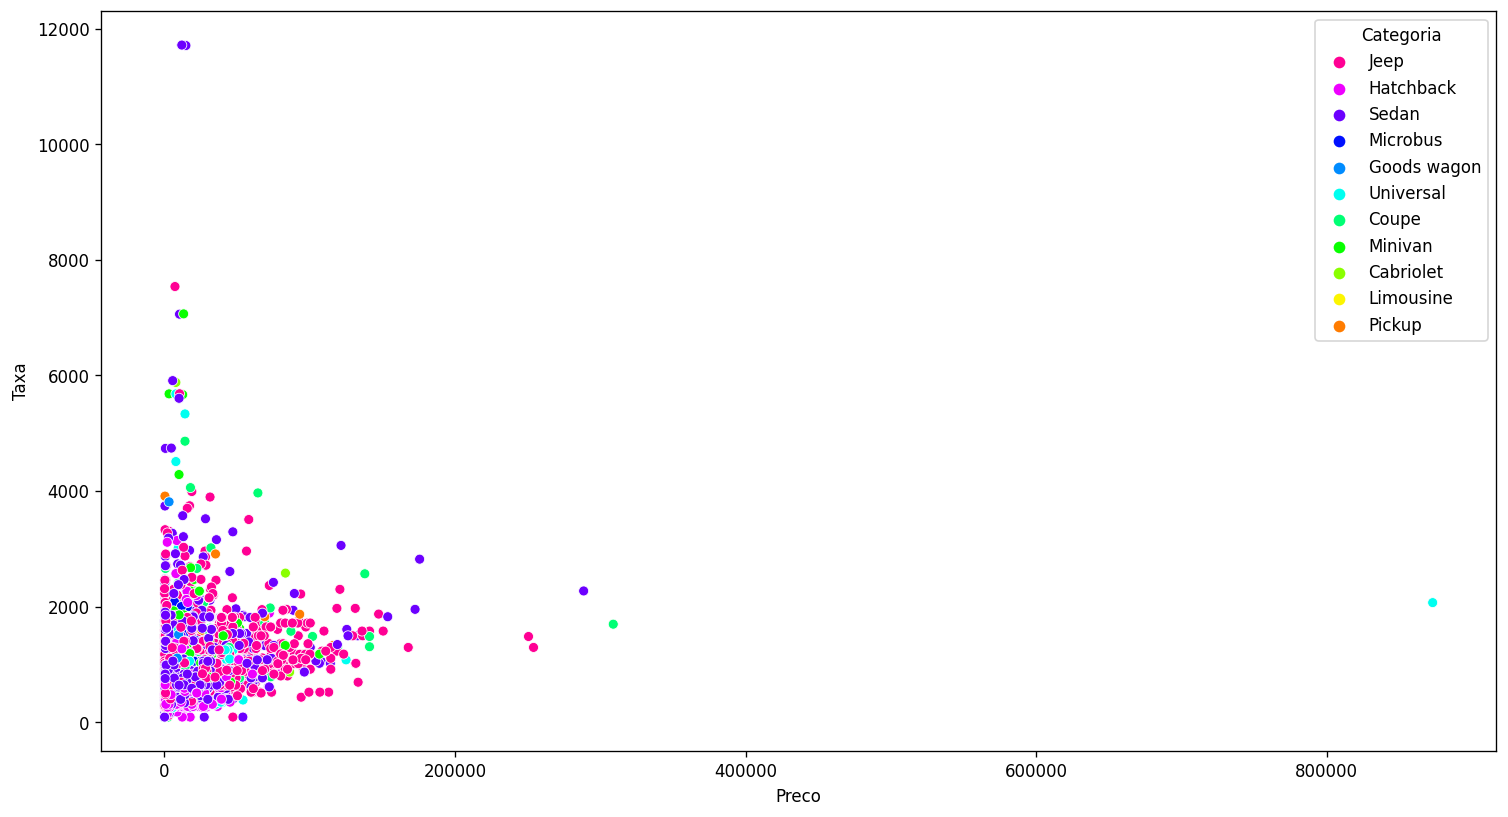

In [36]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Preco', y='Taxa', hue="Categoria", palette="hsv_r")

***Os carros da Jeep são caros, enquanto os Hatchbacks e Micro-ônibus não são caros. O Universal não é caro, mas possui um imposto alto. Podemos observar que existem gráficos ilógicos, como preço alto com imposto baixo e preço baixo com imposto muito alto, que são valores atípicos (vamos corrigir isso posteriormente).***

<Axes: xlabel='Preco', ylabel='Taxa'>

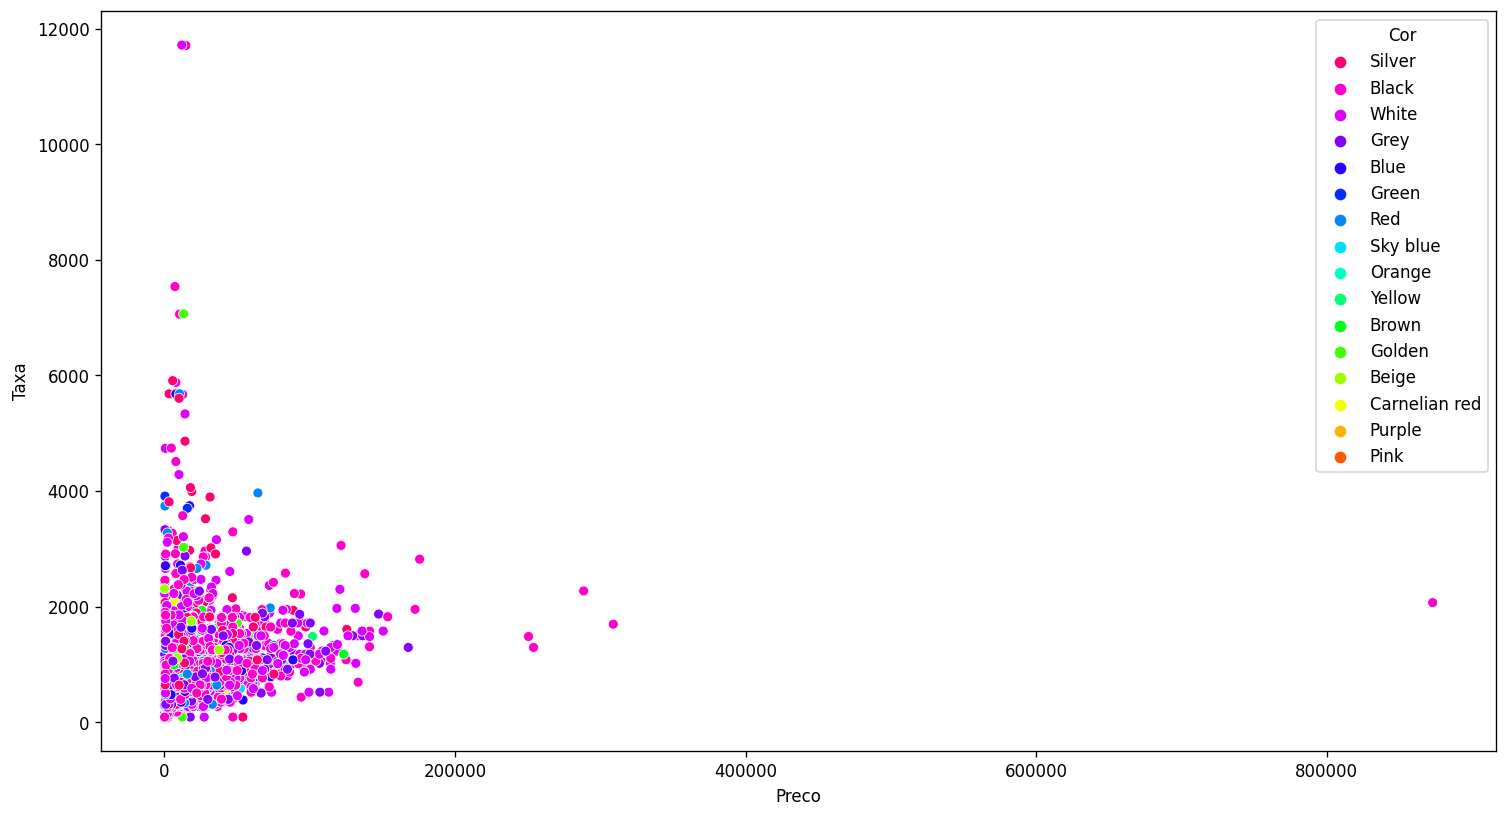

In [37]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Preco', y='Taxa', hue="Cor", palette="hsv_r")

***A cor não afeta o preço do carro***

# Continue data preprocessing

<Axes: >

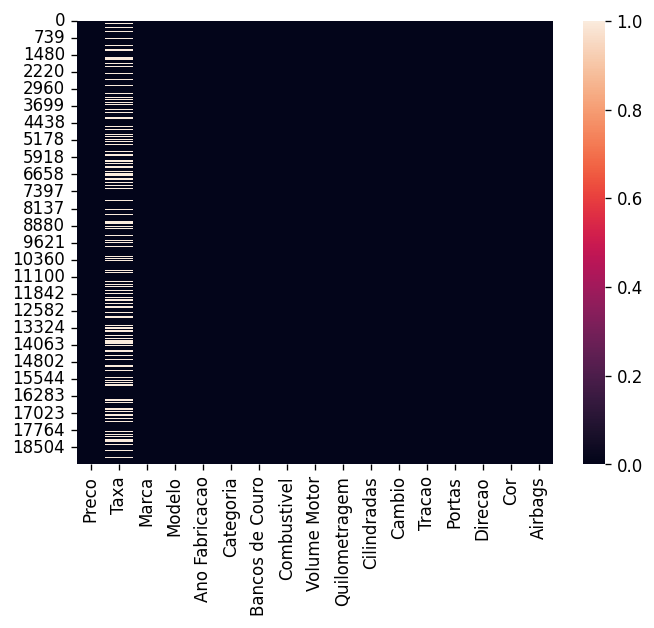

In [38]:
plt.figure(dpi=120)
sns.heatmap(df.isna())

***30% dos valores de taxa são NaN (nulos)***

In [39]:
df = df.drop_duplicates()

***Remover duplicados***

In [40]:
df = df[df['Preco'] > 500]

***Temos valores de preço irreais porque temos carros novos com preço inferior a 500, então ignoramos esses valores***

In [41]:
df = df.reset_index()
df = df.drop('index', axis=1)

In [42]:
df.describe().T

count      mean       std     min      25%       50%  \
Preco          14771.00  21562.00 217272.55  549.00  8507.50  15367.00   
Taxa            9459.00    876.16    459.03   87.00   640.00    779.00   
Ano Fabricacao 14771.00   2010.51      5.93 1943.00  2008.00   2012.00   
Volume Motor   14771.00      1.84      0.86    0.00     1.00      2.00   
Quilometragem  14771.00 139798.13 192224.28    0.00 66756.50 120005.00   
Cilindradas    14771.00      4.47      1.13    1.00     4.00      4.00   
Airbags        14771.00      6.45      4.00    0.00     4.00      5.00   

                     75%         max  
Preco           24148.00 26307500.00  
Taxa             1017.00    11714.00  
Ano Fabricacao   2014.00     2020.00  
Volume Motor        2.00       20.00  
Quilometragem  179200.00  7789999.00  
Cilindradas         4.00       16.00  
Airbags            10.00       16.00

<Axes: xlabel='Taxa', ylabel='Density'>

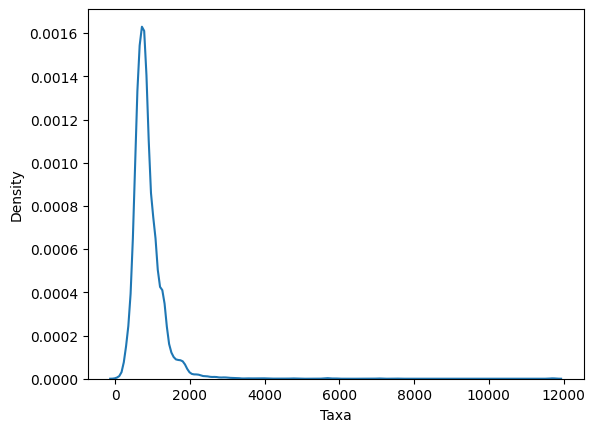

In [43]:
sns.kdeplot(df['Taxa'])

In [44]:
df['Taxa'].fillna(df['Taxa'].median(), inplace=True)

<Axes: xlabel='Taxa', ylabel='Density'>

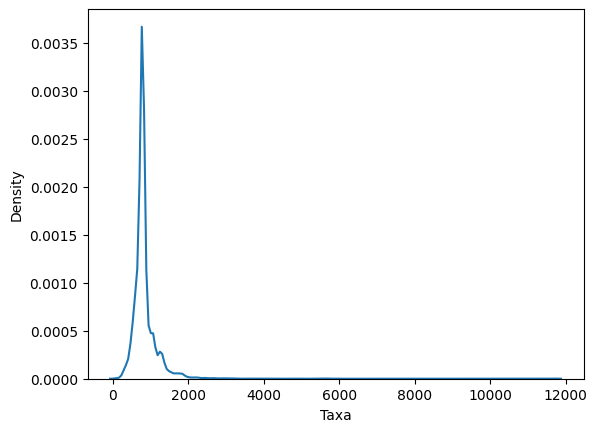

In [45]:
sns.kdeplot(df['Taxa'])

***Preenchemos os dados ausentes com a mediana***

## Por fim: MACHINE LEARNING!

In [47]:
# Separando em X (as características do carro)
x = df.drop(['Preco'], axis=1)

# E y é o preço, aquilo que queremos prever
y = df['Preco']

In [48]:
# Separando em treino e teste!
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y)

In [49]:
# Colunas categóricas tem que ser transformadas em numéricas!
colunas_categoricas = X_treino.select_dtypes(include="object").columns
colunas_numericas = X_treino.select_dtypes(exclude="object").columns

colunas_categoricas, colunas_numericas

(Index(['Marca', 'Modelo', 'Categoria', 'Bancos de Couro', 'Combustivel',
        'Cambio', 'Tracao', 'Portas', 'Direcao', 'Cor'],
       dtype='object'),
 Index(['Taxa', 'Ano Fabricacao', 'Volume Motor', 'Quilometragem',
        'Cilindradas', 'Airbags'],
       dtype='object'))

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Encoding de variáveis categóricas (transformar categorias em números)
OHE = OneHotEncoder(handle_unknown='ignore')

# Scaling de variáveis numéricas (não precisa pra algo de árvores, mas para lineares é importante)
scaler = MinMaxScaler()

# Regressao Linear
LR = LinearRegression()

# Transformar as colunas, separando o tipo de transformação com o tipo de variável
transformer = ColumnTransformer([('cat_cols', OHE, colunas_categoricas),
                                ('num_cols', scaler, colunas_numericas)])

# Criando pipeline! Ele facilita colocar os modelos em produção!
pipe = Pipeline([("preprocessing", transformer),
                ("regressor", LR)])

# treinar o modelo depois das transformações
pipe.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Marca', 'Modelo', 'Categoria', 'Bancos de Couro', 'Combustivel',
       'Cambio', 'Tracao', 'Portas', 'Direcao', 'Cor'],
      dtype='object')),
                                                 ('num_cols', MinMaxScaler(),
                                                  Index(['Taxa', 'Ano Fabricacao', 'Volume Motor', 'Quilometragem',
       'Cilindradas', 'Airbags'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [51]:
# Vamos agora realizar as predições na base de testes para saber se teremos um bom 
# resultado
predicoes = pipe.predict(X_teste)
predicoes[:10]

array([17086.49121762, 34798.15240311,  9039.11860772, 13710.08627843,
        3831.8392645 , -1517.4603499 , 10099.07410635, 11599.71779909,
       44392.0017917 , 16107.27842547])

In [52]:
y_teste.values[:10].flatten()

array([ 4861, 27591,  6272,   627,   549, 10036,  1098, 10036,  5645,
       34497], dtype=int64)

In [53]:
import pickle

arquivo_pipeline = './models/pipe.pickle'
pickle.dump(pipe, open(arquivo_pipeline, 'wb'))

In [54]:
arquivo_carros = './models/carros_df.pickle'
pickle.dump(df, open(arquivo_carros, 'wb'))